## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
### MANOVA (und Faktorenanalyse)

In [143]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Analyse.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16")

In [144]:
#MyData[MyData == 0] <- NA

#### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst.

In [145]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [146]:
vec_AQ2 <- get_vec(MyData,"A.Q2")
vec_AQ3 <- get_vec(MyData,"A.Q3")
vec_CQ1 <- get_vec(MyData,"C.Q1")

#### Funktion für Datenformat (Integer)

In [147]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Faktorenanalyse

In [148]:
library("psych")

In [149]:
FA_AQ2 <- fa(convert_data(MyData,vec_AQ2), nfactors = 3, rotate = "varimax")

In [150]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 6, rotate = "varimax")

In [151]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR4   MR1   MR5   MR6   MR3    h2   u2 com
A.Q3_1  -0.02  0.08  0.07 -0.02 -0.04  0.51 0.277 0.72 1.1
A.Q3_2   0.11 -0.17  0.06  0.12  0.04  0.61 0.426 0.57 1.3
A.Q3_3  -0.04 -0.01  0.11  0.07  0.07  0.47 0.240 0.76 1.2
A.Q3_4  -0.01  0.10 -0.04  0.12  0.15  0.47 0.271 0.73 1.5
A.Q3_5   0.20  0.30  0.08  0.08  0.03  0.41 0.314 0.69 2.5
A.Q3_6   0.80  0.13  0.09  0.05 -0.05  0.09 0.682 0.32 1.1
A.Q3_7   0.79  0.19  0.12  0.13 -0.02  0.04 0.696 0.30 1.2
A.Q3_8   0.80  0.17  0.12  0.10  0.02 -0.04 0.700 0.30 1.2
A.Q3_9   0.54  0.16  0.06  0.16  0.10  0.05 0.361 0.64 1.5
A.Q3_28  0.22  0.18  0.15  0.40  0.08  0.11 0.282 0.72 2.7
A.Q3_10  0.40  0.49  0.03  0.17  0.09 -0.02 0.436 0.56 2.3
A.Q3_11  0.24  0.72  0.07  0.16  0.07  0.03 0.608 0.39 1.4
A.Q3_12  0.22  0.62  0.13  0.18  0.02  0.04 0.4

In [152]:
#write.csv2(FA_AQ3$weights, file ="D:\\Daten\\DISS\\Daten\\FA_weights.csv",row.names=TRUE)

Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ2):

* MR1: Kenntnisse des Deutschen nutzen (inkl. Kontext)
* MR2: Soziale Strategien
* MR3: Sprachkenntnisse nutzen (insbes. weitere Sprachen, Erstsprache)


Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ3):

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* MR3: interlinguale Hinweise (inkl. Ethymologie)
* MR4: engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* MR5: metakognitive Strategien
* MR6: Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation


### MANOVA AQ2, AQ3

Matrix AQ2:

In [153]:
A2 = convert_data(MyData,vec_AQ2)
A2[is.na(A2)] <- 0 
A2 <- as.matrix(A2)

B2 = FA_AQ2$weights
B2 <- as.matrix(B2)

C2 <- A2 %*% B2

In [154]:
Df_total2 <- merge(MyData,C2,by=0, sort=FALSE)
Df_total2[Df_total2 == 0] <- NA
#Df_total2[is.na(Df_total2)] <- 0

Matrix AQ3:

In [155]:
A = convert_data(MyData,vec_AQ3)
A[is.na(A)] <- 0 
A <- as.matrix(A)

B = FA_AQ3$weights
B <- as.matrix(B)

C <- A %*% B

In [156]:
Df_total <- merge(MyData,C,by=0, sort=FALSE)
Df_total[Df_total == 0] <- NA
#Df_total[is.na(Df_total)] <- 0

Vektoren mit zu untersuchenden Variablen:

In [157]:
vec_V <- get_vec(Df_total,"V_")
vec_W <- get_vec(Df_total,"W_")

In [158]:
remove <- c(66,69)
vec_V[!vec_V %in% remove]

[1] 64 65 67 68 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
[26] 91 92

Die Variable an Position 66 ("Niveau des aktuellen Deutschkurses") wird im Fall der Analyse getrennt nach Niveaustufen nicht berücksichtigt.

In [159]:
colnames(Df_total[,vec_V[!vec_V %in% remove]])

[1] "V_L1.Bi.Trilingualismus" "V_Studienrichtung"      
 [3] "V_Alter"                 "V_Geschlecht"           
 [5] "V_Spr_Zahl"              "V_Spr_Fran"             
 [7] "V_Spr_Griech"            "V_Spr_Latein"           
 [9] "V_Spr_Germ"              "V_Spr_Rom"              
[11] "V_Spr_Slaw"              "V_Spr_Asiat"            
[13] "V_E_Schule_LL"           "V_E_Schule_Eng"         
[15] "V_E_Schule_Spr"          "V_E_Univ_DK"            
[17] "V_E_Univ_andere"         "V_E_Sprachschule"       
[19] "V_E_DK_aktuell"          "V_E_Sozial"             
[21] "V_E_autonom"             "V_Met_Erkl"             
[23] "V_Met_Tipps"             "V_Met_Training"         
[25] "V_Met_Vgl"               "V_Met_Reflexion"        
[27] "V_Met_unbewusst"

In [160]:
for (v in vec_V){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_V){Df_total2[,v] <- as.factor(Df_total2[,v])}
for (v in vec_W){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_W){Df_total2[,v] <- as.factor(Df_total2[,v])}

In [161]:
#eje <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ V_Geschlecht, data = Df_total))

In [162]:
#for (i in vec_V){
#    print(summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ Df_total[,i], data = Df_total)))
#}

Funktionen zur Berechnung der MANOVA und t-Test:

In [163]:
MANOVA2_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,vec[1]], data = df))
    RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,i], data = df))
        RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN2) <- colnames(df)[vec]
    RES_MAN2
}

In [164]:
MANOVA2a_table <- function(df,vec){
    man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,vec[1]], data = df))
    RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,i], data = df))
        RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN2) <- colnames(df)[vec]
    RES_MAN2
}

In [165]:
MANOVA3_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,vec[1]], data = df))
    RES_MAN3 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,i], data = df))
        RES_MAN3 <- rbind(RES_MAN3,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN3) <- colnames(df)[vec]
    RES_MAN3
}

In [166]:
tabletstbonf2 <- function(data ,v ,facts=c("MR1","MR2","MR3")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

In [167]:
tabletstbonf <- function(data ,v ,facts=c("MR1","MR2","MR3","MR4","MR5","MR6")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

### AQ2

MANOVA (gesamt):

In [168]:
res_manova2 <- MANOVA2_table(Df_total2,vec_V)
res2 <- res_manova2[res_manova2['Pr(>F)'] < 0.05,]
res2

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.06431145,2.818671,9,1158,2.788966e-03
V_Niveau_DK,4,0.21771337,7.531543,12,1155,1.576713e-13
V_Alter,3,0.05521767,2.412631,9,1158,1.031898e-02
V_Spr_Germ,1,0.03281690,4.365710,3,386,4.865961e-03
V_E_Schule_Eng,1,0.02372938,3.127391,3,386,2.576800e-02
V_E_Schule_Spr,1,0.02679201,3.542140,3,386,1.478592e-02
V_E_Univ_DK,1,0.05913717,8.087239,3,386,3.086102e-05
V_E_Univ_andere,1,0.04878842,6.599418,3,386,2.333991e-04
V_E_Sprachschule,1,0.02562264,3.383474,3,386,1.829447e-02
V_E_DK_aktuell,1,0.03435261,4.577277,3,386,3.652933e-03


In [169]:
write.csv2(res2, file ="D:\\Daten\\DISS\\Daten\\Resmanova2.csv",row.names=TRUE)

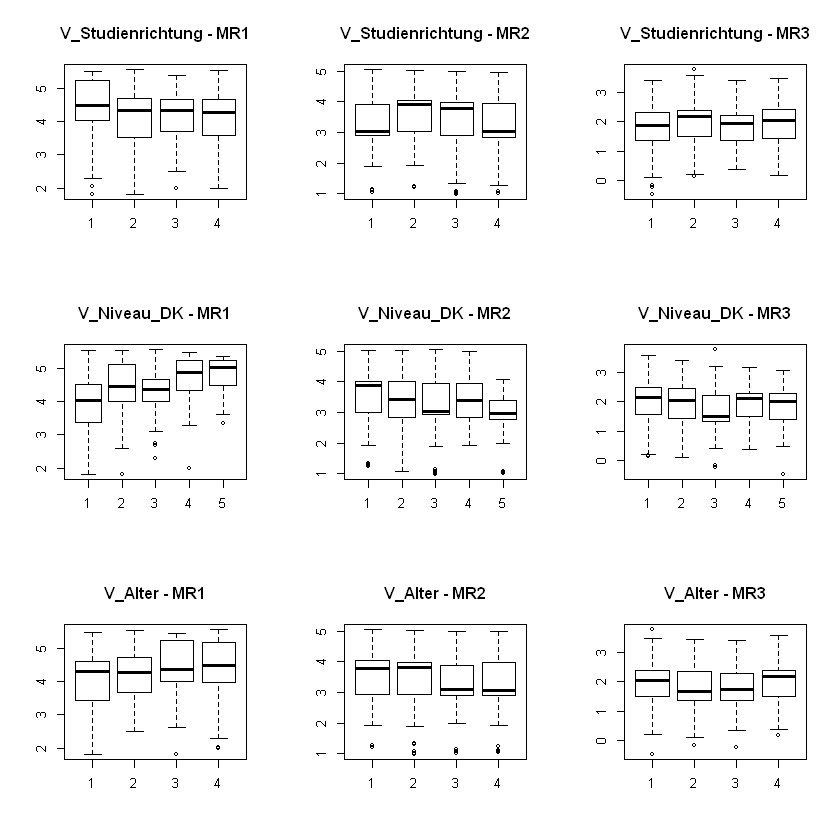

In [170]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR3')
boxplot(MR1~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR3')
boxplot(MR1~V_Alter, data = Df_total2, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total2, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total2, main = 'V_Alter - MR3')

In [171]:
res_manova2a <- MANOVA2a_table(Df_total2,vec_V)
res_manova2a[res_manova2a['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.09196955,1.725879,21,1146,2.199743e-02
V_Niveau_DK,4,0.27570654,4.039880,28,1528,1.123348e-11
V_Alter,3,0.08754787,1.640409,21,1146,3.431158e-02
V_Geschlecht,1,0.03755064,2.062259,7,370,4.680279e-02
V_Spr_Germ,1,0.04447891,2.540266,7,382,1.447668e-02
V_E_Schule_Eng,1,0.03843996,2.181584,7,382,3.509716e-02
V_E_Schule_Spr,1,0.04021356,2.286458,7,382,2.719377e-02
V_E_Univ_DK,1,0.07328588,4.315587,7,382,1.295610e-04
V_E_Univ_andere,1,0.05669403,3.279821,7,382,2.132283e-03
V_E_DK_aktuell,1,0.06476916,3.779330,7,382,5.591878e-04


t-Test (gesamt):

In [172]:
#rownames(res_manova2[res_manova2['Pr(>F)'] < 0.05,])

In [173]:
ttest_A2 <- tabletstbonf2(Df_total2,c('V_Spr_Germ',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Training',
 'V_Met_Reflexion',
 'V_Met_unbewusst'
 ))
ttest_A2

,MR1,MR2,MR3
V_Spr_Germ,1.732609e-03,0.561229033,0.06769899
V_E_Schule_Eng,3.133540e-01,0.004123614,0.97301593
V_E_Schule_Spr,1.558504e-02,0.033503904,0.80728404
V_E_Univ_DK,1.077163e-05,0.318273822,0.15826296
V_E_Univ_andere,1.337741e-05,0.529285123,0.60048378
V_E_Sprachschule,1.863001e-02,0.036066435,0.86796622
V_E_DK_aktuell,3.266436e-02,0.004337802,0.39612632
V_E_Sozial,4.590967e-03,0.781065313,0.93771497
V_E_autonom,3.278314e-02,0.342625921,0.02978431
V_Met_Training,9.900044e-03,0.026773870,0.81535457


In [174]:
write.csv2(ttest_A2, file ="D:\\Daten\\DISS\\Daten\\Ttest_A2.csv",row.names=TRUE)

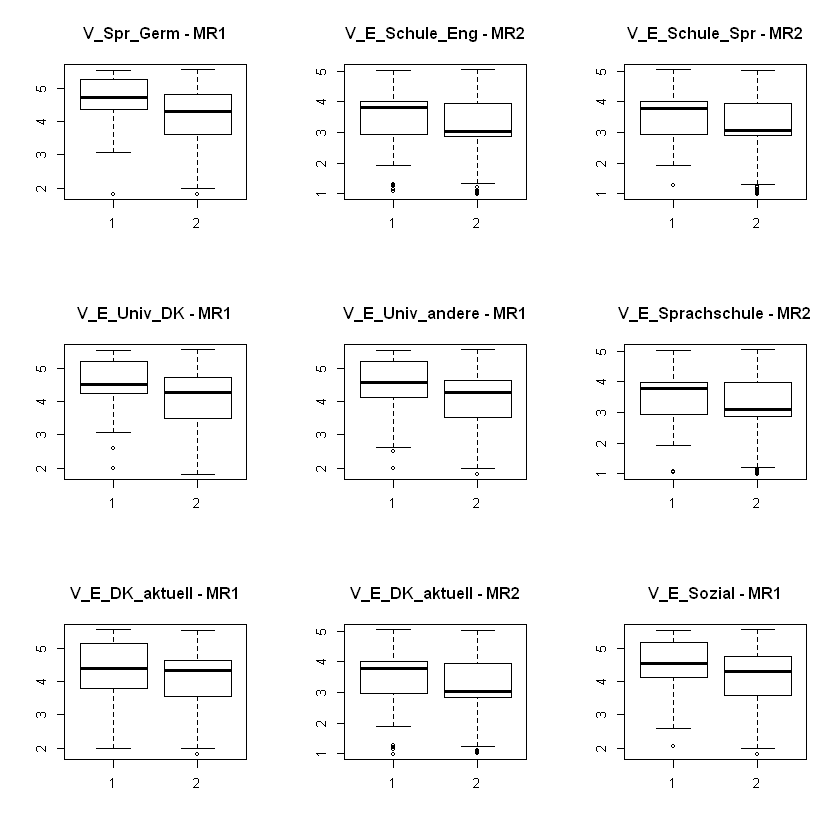

In [175]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total2, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_E_Schule_Eng, data = Df_total2, main = 'V_E_Schule_Eng - MR2')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2, main = 'V_E_Schule_Spr - MR2')
boxplot(MR1~V_E_Univ_DK, data = Df_total2, main = 'V_E_Univ_DK - MR1')
boxplot(MR1~V_E_Univ_andere, data = Df_total2, main = 'V_E_Univ_andere - MR1')
boxplot(MR2~V_E_Sprachschule, data = Df_total2, main = 'V_E_Sprachschule - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR2')
boxplot(MR1~V_E_Sozial, data = Df_total2, main = 'V_E_Sozial - MR1')

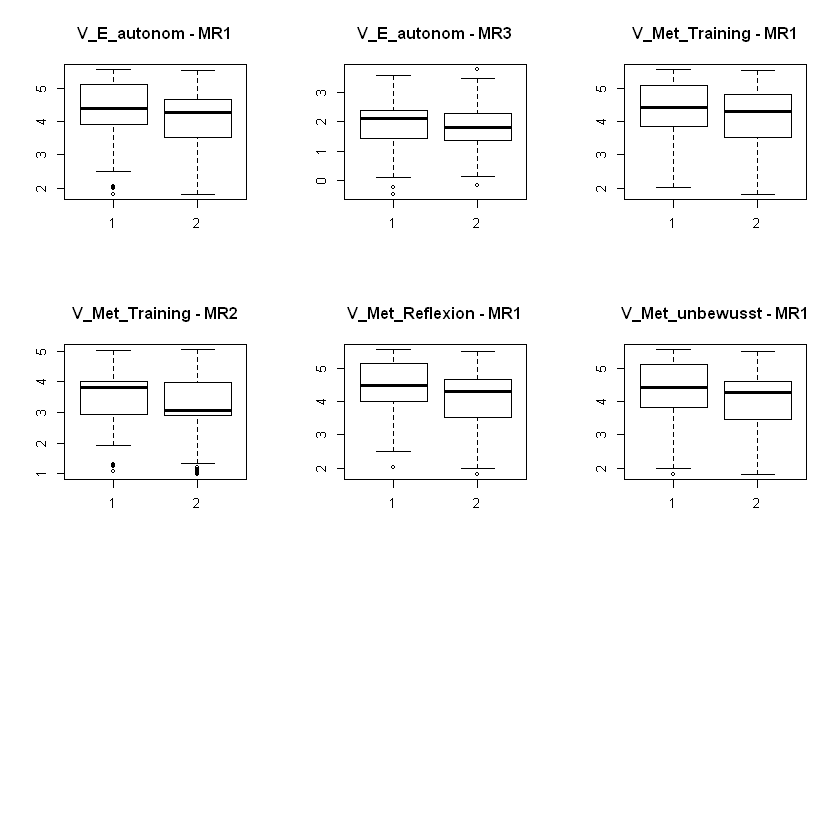

In [176]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR1')
boxplot(MR3~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR3')
boxplot(MR1~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR1')
boxplot(MR2~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR2')
boxplot(MR1~V_Met_Reflexion, data = Df_total2, main = 'V_Met_Reflexion - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2, main = 'V_Met_unbewusst - MR1')

In [177]:
summary(Df_total2[,vec_V])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Niveau_DK V_Alter V_Geschlecht
 1:103                   1:130             1:151       1:115   1   :287    
 2:287                   2: 99             2: 66       2: 84   2   : 91    
                         3: 70             3:103       3: 66   NA's: 12    
                         4: 91             4: 34       4:125               
                                           5: 36                           
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ
 1:363              1: 34      1:271      1:110        1:187        1: 37     
 2: 27              3: 85      2:119      2:280        2:203        2:353     
                    4:115                                                     
                    5:156                                                     
                                                                              
 V_Spr_Rom V_Spr_Slaw V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Sch

MANOVA (A1):

In [178]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Univ_DK,1,0.07176276,3.788229,3,147,0.01181444
V_E_DK_aktuell,1,0.05881736,3.062159,3,147,0.03008671
V_E_Sozial,1,0.05680872,2.951286,3,147,0.03469212
V_Met_Vgl,1,0.05220470,2.698927,3,147,0.04794599


In [179]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],c('V_E_Univ_DK',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_Met_Vgl'
 ))

,MR1,MR2,MR3
V_E_Univ_DK,0.003883776,0.33733652,0.53833406
V_E_DK_aktuell,0.349593151,0.01882661,0.29581645
V_E_Sozial,0.065480948,0.88059378,0.01420207
V_Met_Vgl,0.380237202,0.01288455,0.72560875


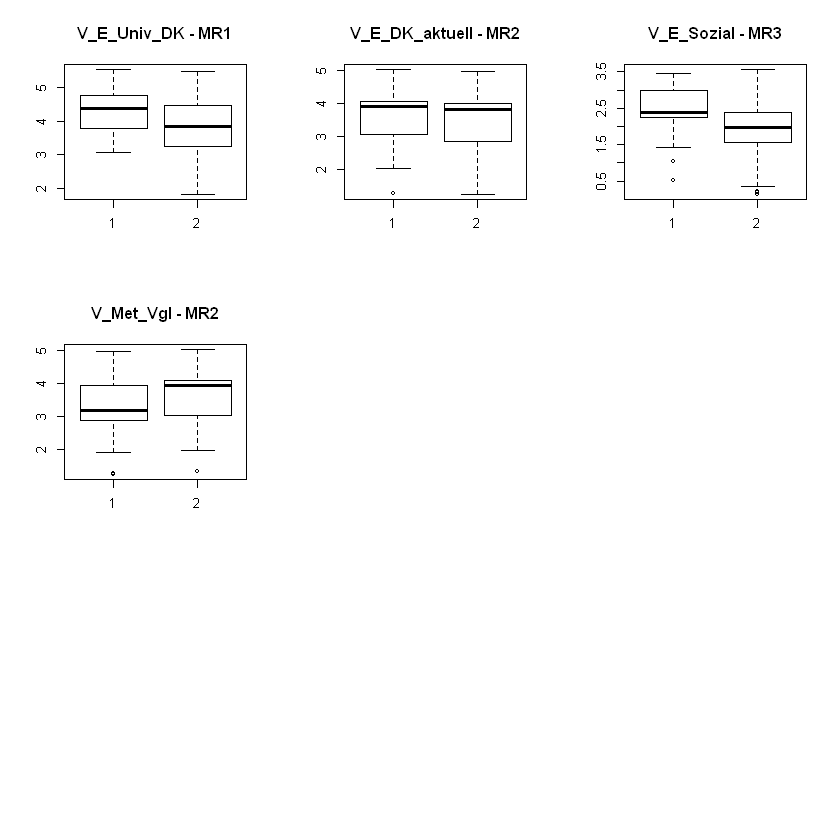

In [180]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Univ_DK, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_Sozial, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Sozial - MR3')
boxplot(MR2~V_Met_Vgl, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_Met_Vgl - MR2')

MANOVA (A2):

In [181]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Schule_Eng,1,0.1615030,3.980610,3,62,0.01168733
V_Met_Erkl,1,0.1442747,3.484385,3,62,0.02094564


In [182]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],c('V_E_Schule_Eng','V_Met_Erkl'))

,MR1,MR2,MR3
V_E_Schule_Eng,0.003035794,0.12148156,0.7454012
V_Met_Erkl,0.057799951,0.01681794,0.6260147


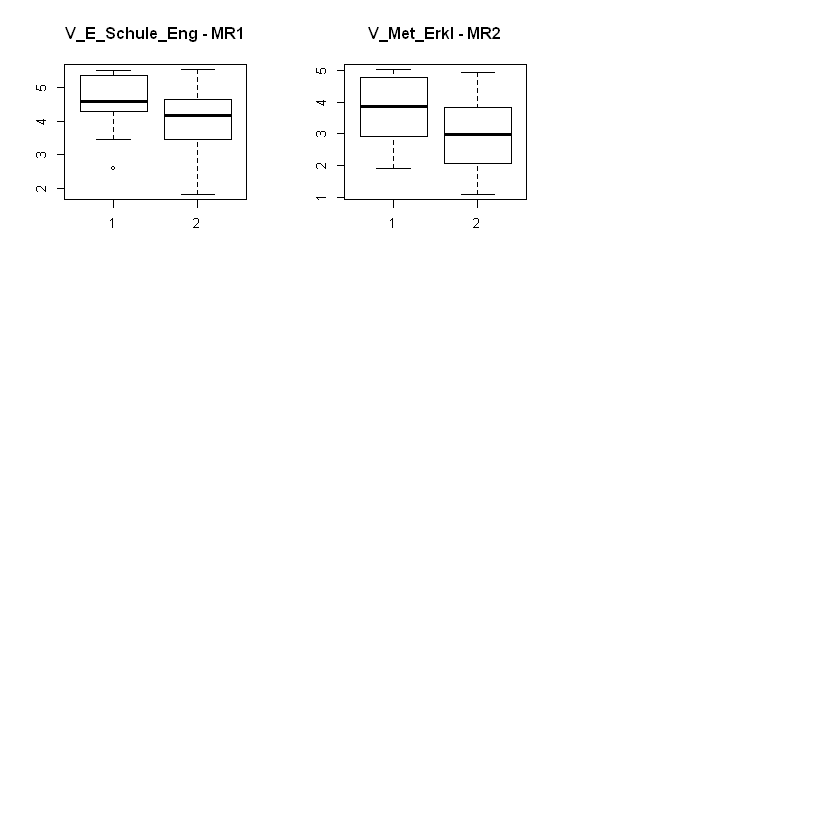

In [183]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Schule_Eng, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_E_Schule_Eng - MR1')
boxplot(MR2~V_Met_Erkl, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_Met_Erkl - MR2')

MANOVA (B1):

In [184]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Spr_Germ,1,0.10552389,3.893104,3,99,0.011222084
V_E_Schule_Spr,1,0.11748869,4.393289,3,99,0.006032423
V_E_DK_aktuell,1,0.15013766,5.829818,3,99,0.001038973
V_Met_unbewusst,1,0.08631338,3.117416,3,99,0.029543217


In [185]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],c('V_Spr_Germ',
 'V_E_Schule_Spr',                                                             
 'V_E_DK_aktuell',
 'V_Met_unbewusst'
 ))

,MR1,MR2,MR3
V_Spr_Germ,0.7340752194,0.0325437164,0.007535634
V_E_Schule_Spr,0.2064510977,0.0009323736,0.760006150
V_E_DK_aktuell,0.0002094006,0.0648808647,0.442166581
V_Met_unbewusst,0.0050459571,0.4698587561,0.158121289


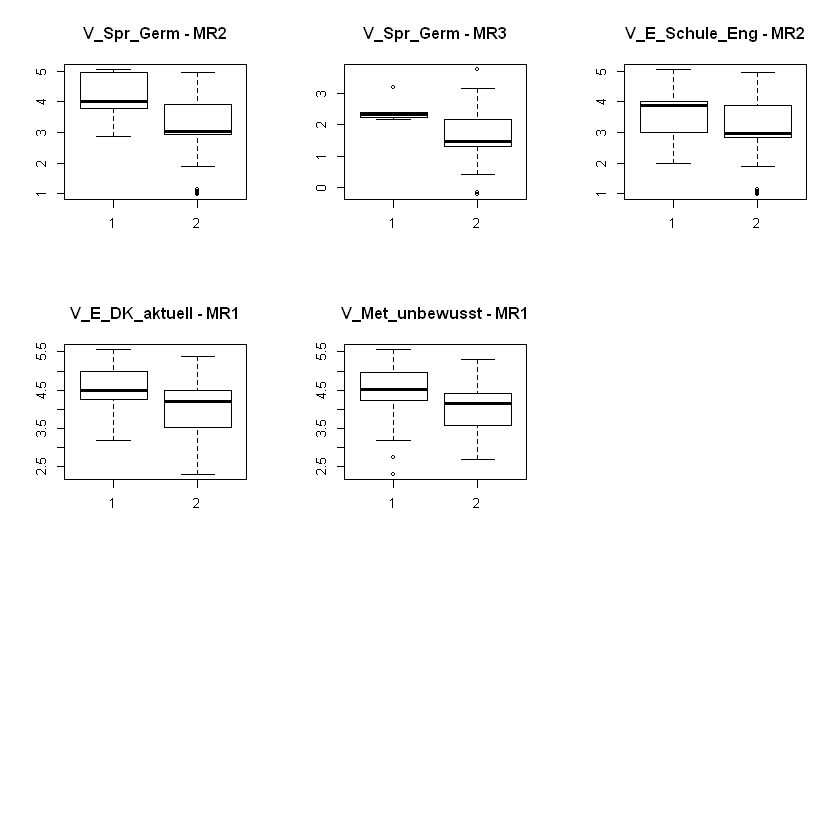

In [186]:
par(mfrow=c(3,3))
boxplot(MR2~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR2')
boxplot(MR3~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR3')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_Schule_Eng - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_DK_aktuell - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Met_unbewusst - MR1')

In [187]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='3'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter V_Geschlecht V_Spr_Zahl
 1:28                    1:51              1: 8    1   :77      1: 9      
 2:75                    2:10              2:31    2   :25      3:23      
                         3:20              3:26    NA's: 1      4:33      
                         4:22              4:38                 5:38      
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:73       1:28         1:53         1: 6       1:37      1: 5      
 2:30       2:75         2:50         2:97       2:66      2:98      
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1:12        1:30          1:49           1:43           1:36       
 2:91        2:73          2:54           2:60           2:67       
                                                                    

MANOVA (B2):

In [188]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.5096098,2.046305,9,90,0.042938242
V_Spr_Zahl,3,0.6585984,2.812838,9,90,0.005870778
V_Spr_Slaw,1,0.2524333,3.376732,3,30,0.031099649


In [189]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],c('V_Studienrichtung',
 'V_Spr_Zahl',
 'V_Spr_Slaw'
 ))

ERROR: Error in dimnames(x) <- dn: Länge von 'dimnames' [2] ungleich der Arrayausdehnung


In [190]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='4'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter V_Geschlecht V_Spr_Zahl
 1:10                    1:12              1: 2    1   :25      1: 1      
 2:24                    2: 3              2: 1    2   : 8      3: 5      
                         3:12              3:11    NA's: 1      4: 7      
                         4: 7              4:20                 5:21      
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:25       1:10         1:16         1: 6       1:12      1: 5      
 2: 9       2:24         2:18         2:28       2:22      2:29      
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 4        1:13          1:14           1:18           1:16       
 2:30        2:21          2:20           2:16           2:18       
                                                                    

MANOVA (C):

In [191]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


### AQ3

MANOVA (gesamt):

In [192]:
res_anova3 <- MANOVA3_table(Df_total,vec_V)
res3 <- res_anova3[res_anova3['Pr(>F)'] < 0.05,]
res3

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Niveau_DK,4,0.31807642,5.514476,24,1532,3.805622e-16
V_Alter,3,0.12107614,2.684577,18,1149,1.690069e-04
V_Spr_Germ,1,0.04993524,3.355069,6,383,3.104306e-03
V_E_Univ_DK,1,0.07562281,5.222172,6,383,3.487517e-05
V_E_Univ_andere,1,0.05889957,3.995063,6,383,6.813516e-04
V_E_Sozial,1,0.03445723,2.278014,6,383,3.575307e-02
V_E_autonom,1,0.03844979,2.552522,6,383,1.953146e-02
V_Met_unbewusst,1,0.03759818,2.493779,6,383,2.225827e-02


In [193]:
write.csv2(res3, file ="D:\\Daten\\DISS\\Daten\\Resmanova3.csv",row.names=TRUE)

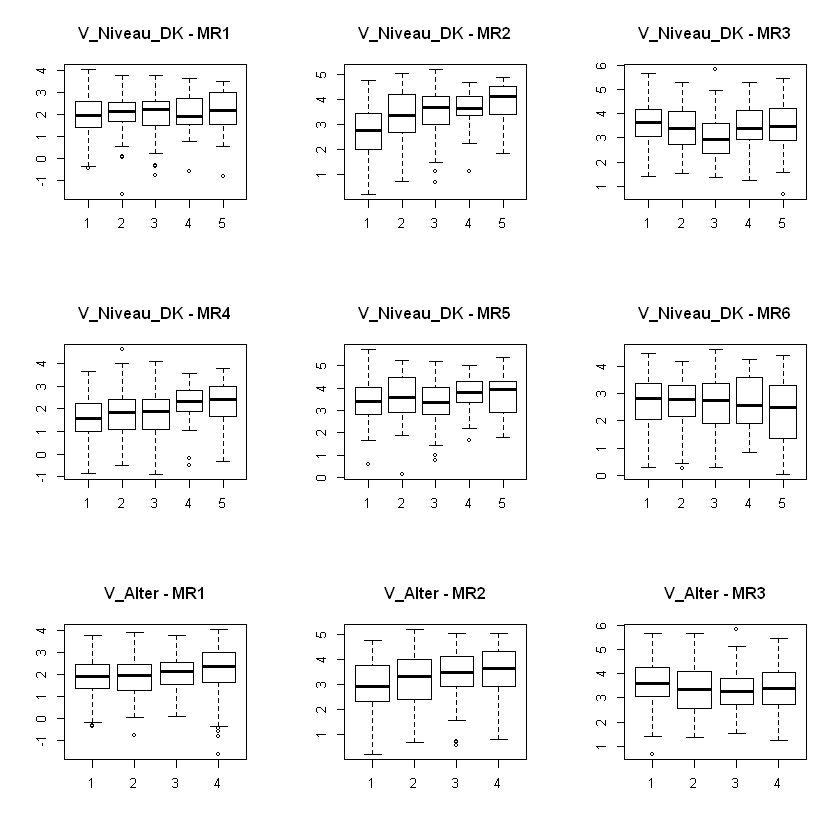

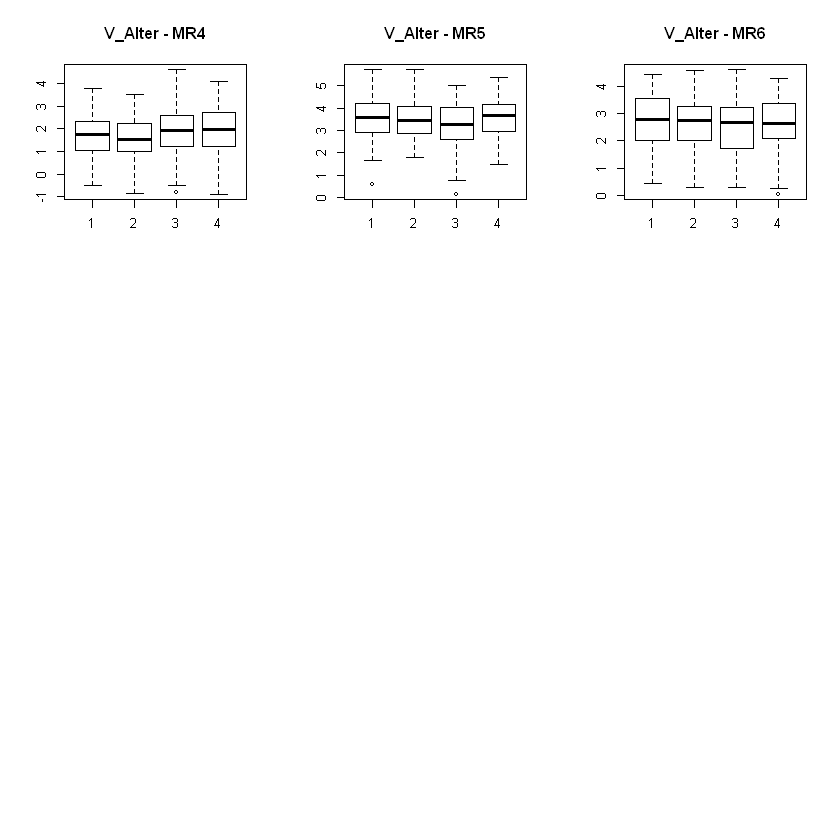

In [194]:
par(mfrow=c(3,3))
boxplot(MR1~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR3')
boxplot(MR4~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR4')
boxplot(MR5~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR5')
boxplot(MR6~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR6')
boxplot(MR1~V_Alter, data = Df_total, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total, main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total, main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total, main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total, main = 'V_Alter - MR6')

In [195]:
ttest_A3 <- tabletstbonf(Df_total,c('V_Spr_Germ',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_unbewusst'
 ))
ttest_A3

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.009509611,8.489184e-03,0.04475461,0.04646641,0.64219852,0.9986724
V_E_Univ_DK,0.858553769,8.718888e-06,0.02124233,0.15363378,0.04994204,0.7713164
V_E_Univ_andere,0.401098551,1.388439e-04,0.94092077,0.00162542,0.30199097,0.8193000
V_E_Sozial,0.037403622,8.048110e-02,0.56902404,0.36432732,0.01468615,0.3131402
V_E_autonom,0.026052682,5.708381e-02,0.26383344,0.84828509,0.02254485,0.3051606
V_Met_unbewusst,0.067568088,1.044458e-01,0.05622976,0.62255664,0.04335754,0.2145725


In [196]:
write.csv2(ttest_A3, file ="D:\\Daten\\DISS\\Daten\\Ttest_A3.csv",row.names=TRUE)

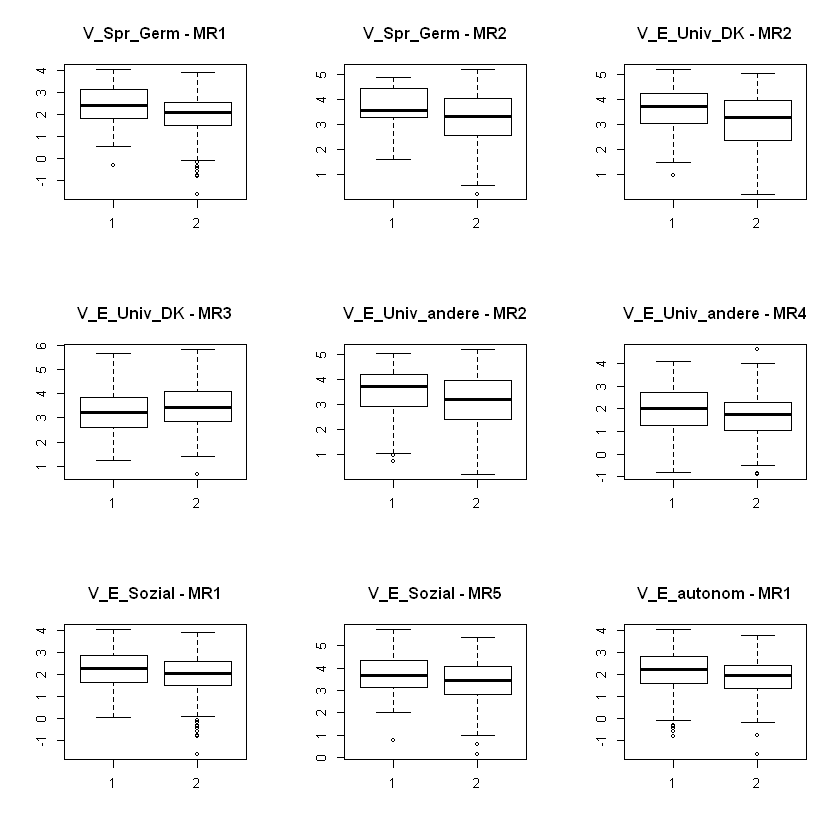

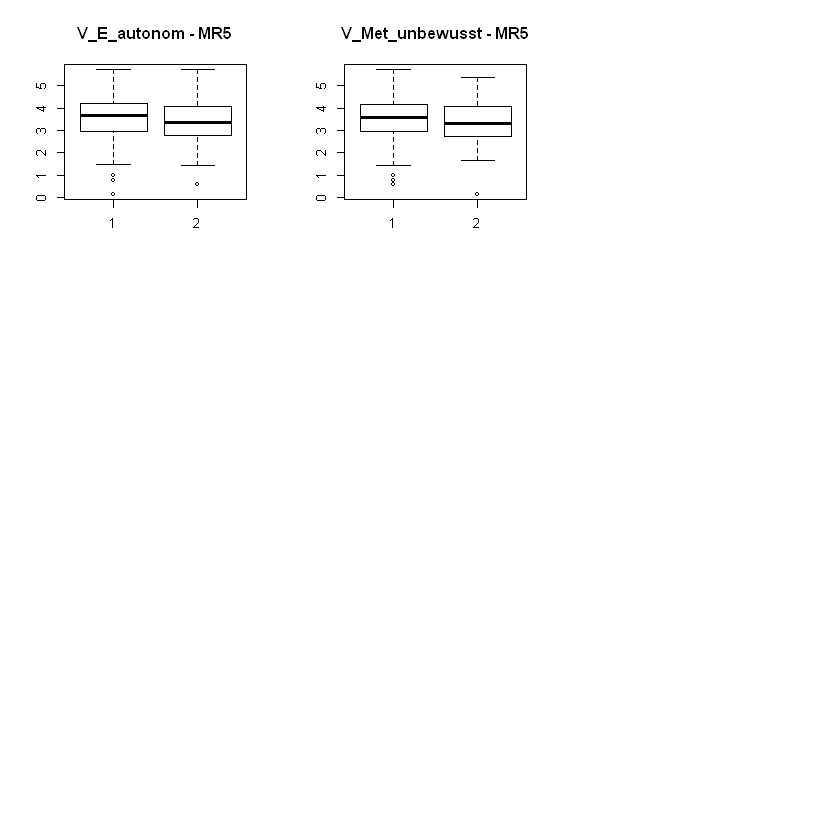

In [197]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR2')
boxplot(MR3~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR3')
boxplot(MR2~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR2')
boxplot(MR4~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR4')
boxplot(MR1~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR1')
boxplot(MR5~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR5')
boxplot(MR1~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR1')
boxplot(MR5~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR5')
boxplot(MR5~V_Met_unbewusst, data = Df_total, main = 'V_Met_unbewusst - MR5')

MANOVA (A1):

In [198]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.21987268,1.898094,18,432,0.014572179
V_Alter,3,0.19752165,1.691545,18,432,0.037813416
V_Spr_Rom,1,0.10684444,2.871019,6,144,0.011334123
V_E_Univ_DK,1,0.12245628,3.349065,6,144,0.004050773
V_E_DK_aktuell,1,0.09166117,2.421858,6,144,0.029261955


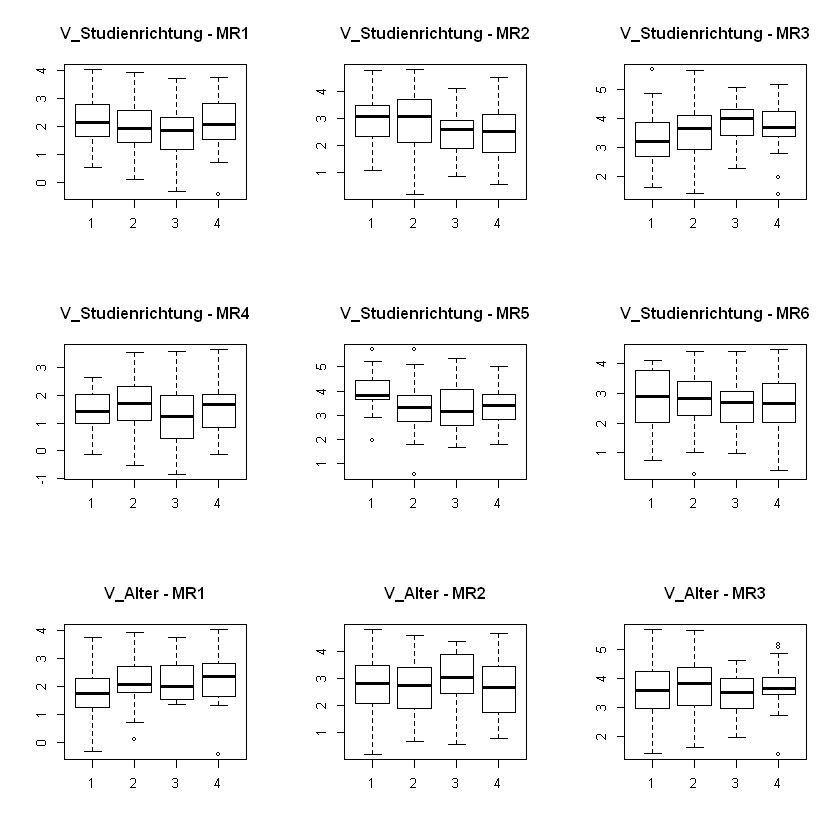

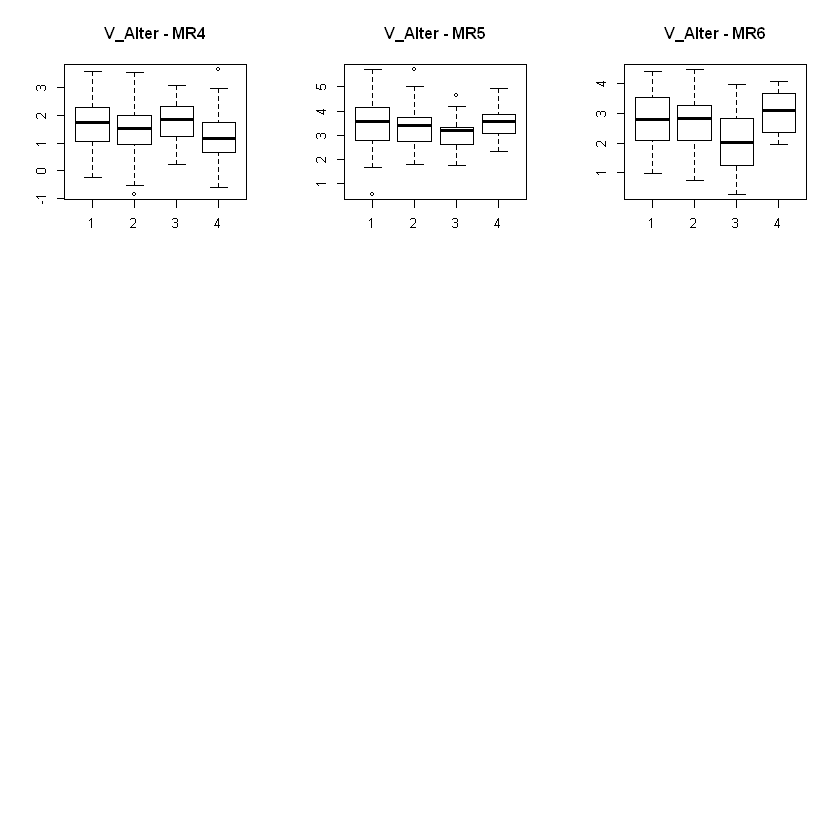

In [199]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR6')
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR6')

In [200]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='1'),],c('V_Spr_Rom','V_E_Univ_DK','V_E_DK_aktuell'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Rom,0.4867221,0.003099975,0.12996640,0.06534695,0.18601426,0.9188775
V_E_Univ_DK,0.3983386,0.002150153,0.20323868,0.86157894,0.01233046,0.3567748
V_E_DK_aktuell,0.9225025,0.023055480,0.00642751,0.37573185,0.51025165,0.4852098


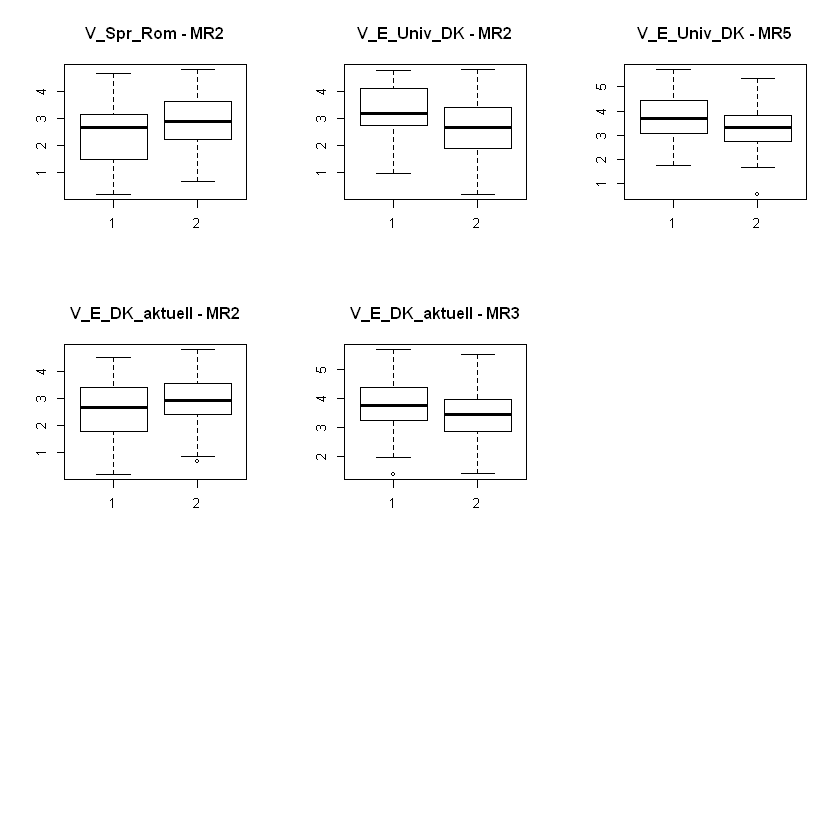

In [201]:
par(mfrow=c(3,3))
boxplot(MR2~V_Spr_Rom, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Spr_Rom - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR2')
boxplot(MR5~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR5')
boxplot(MR2~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR3')

MANOVA (A2):

In [202]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Alter,3,0.5468773,2.192156,18,177,0.004950034


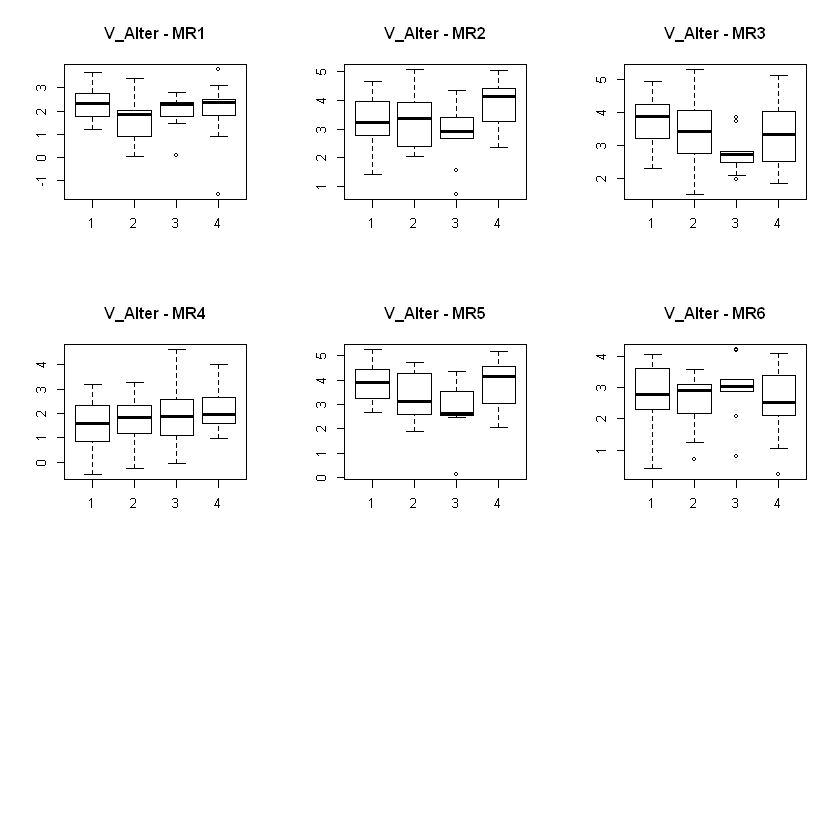

In [203]:
par(mfrow=c(3,3))
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR6')

MANOVA (B1):

In [204]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


MANOVA (B2):

In [205]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


MANOVA (C):

In [206]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Spr_Germ,1,0.3552337,2.662922,6,29,0.035035279
V_Spr_Slaw,1,0.3733015,2.879040,6,29,0.025188816
V_E_Univ_andere,1,0.3650631,2.778971,6,29,0.029332964
V_E_Sozial,1,0.3716639,2.858941,6,29,0.025969580
V_Met_Training,1,0.4347709,3.717771,6,29,0.007291216


In [207]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='5'),],c('V_Spr_Germ','V_Spr_Slaw','V_E_Univ_andere','V_E_Sozial','V_Met_Training'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.004742052,0.533410608,0.06591668,0.0522948034,0.08158033,0.5380848487
V_Spr_Slaw,0.051264320,0.900785030,0.03888591,0.0225031088,0.78413729,0.6947990058
V_E_Univ_andere,0.030507235,0.180184179,0.94251238,0.0009916848,0.95638032,0.0339899844
V_E_Sozial,0.177614018,0.003870182,0.97057397,0.2399834617,0.02960205,0.0555051883
V_Met_Training,0.056071226,0.282017719,0.02238968,0.4070634748,0.37704510,0.0008507369


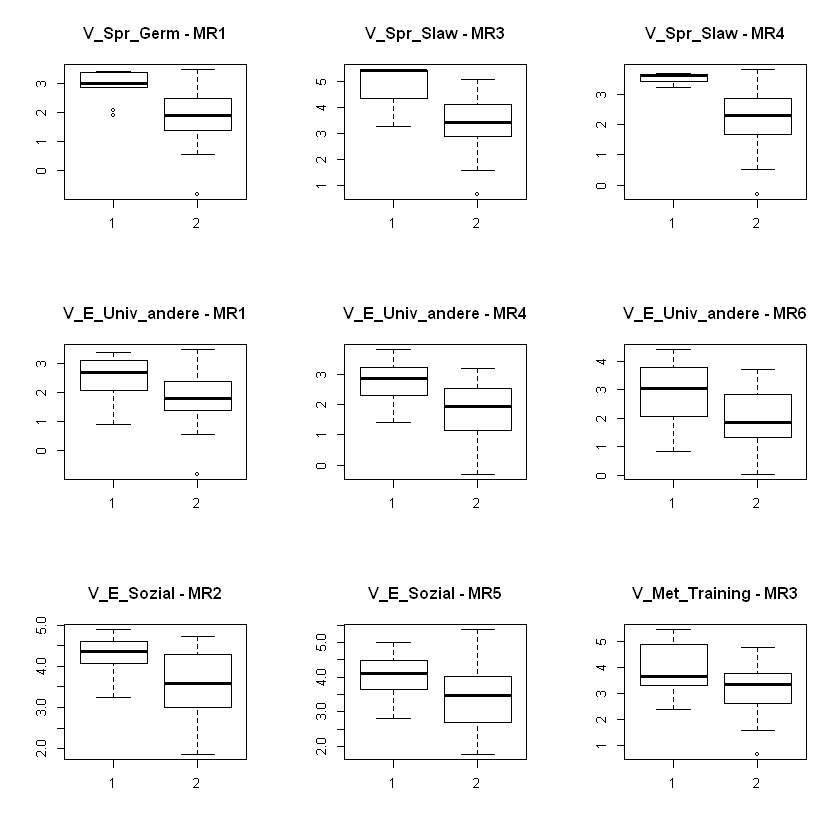

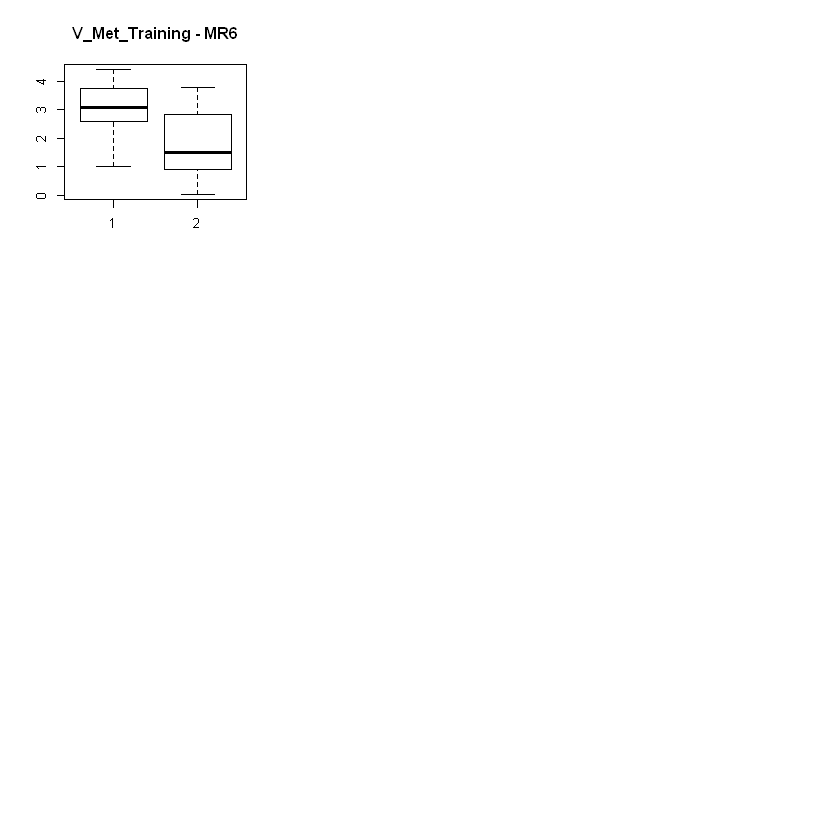

In [208]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Germ - MR1')
boxplot(MR3~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR3')
boxplot(MR4~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR4')
boxplot(MR1~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR1')
boxplot(MR4~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR4')
boxplot(MR6~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR6')
boxplot(MR2~V_E_Sozial, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Sozial - MR2')
boxplot(MR5~V_E_Sozial, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Sozial - MR5')
boxplot(MR3~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR3')
boxplot(MR6~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR6')

In [209]:
summary(Df_total[which(Df_total$V_Niveau_DK=='5'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter V_Geschlecht V_Spr_Zahl
 1: 7                    1:19              1: 5    1   :29      1: 2      
 2:29                    2: 0              2: 0    2   : 5      3: 9      
                         3: 6              3: 6    NA's: 2      4:10      
                         4:11              4:25                 5:15      
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:28       1: 9         1:17         1: 9       1:16      1: 3      
 2: 8       2:27         2:19         2:27       2:20      2:33      
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 5        1:10          1:16           1:15           1:17       
 2:31        2:26          2:20           2:21           2:19       
                                                                    

### Überprüfung weiterer möglicher Einflussfaktoren

In [210]:
res_anova2w <- MANOVA2_table(Df_total2,vec_W)
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.02393868,3.155652,3,386,0.024813950
W_Univ,6,0.10714250,2.364189,18,1149,0.001079207


In [211]:
tabletstbonf2(Df_total2,c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01182687,0.1034725,0.6951215


In [212]:
remove1 <- c(97)
vec_W[!vec_W %in% remove1]

[1] 93 94 95 96

In [213]:
res_anova2w <- MANOVA2_table(Df_total2[which(Df_total$W_Univ=='1'),],vec_W[!vec_W %in% remove1])
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.06519717,3.440719,3,148,0.01846834


In [214]:
tabletstbonf2(Df_total2[which(Df_total$W_Univ=='1'),],c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01165647,0.1505467,0.5354974


In [215]:
res_anova3w <- MANOVA3_table(Df_total,vec_W)
res_anova3w[res_anova3w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Papierversion_FB,1,0.03464824,2.291095,6,383,3.475059e-02
W_Univ,6,0.22890644,2.531905,36,2298,1.590880e-06


In [216]:
tabletstbonf(Df_total,c('W_Papierversion_FB'))

,MR1,MR2,MR3,MR4,MR5,MR6
W_Papierversion_FB,0.568019,0.0008198992,0.2495228,0.5317759,0.4491906,0.9810195


### Biplots

Funktionen:

In [217]:
# Using non vectorial programming (for rather than matrices) is less efficient
# except for large data matices
TransformIni <- function(X, InitTransform="None", transform = "Standardize columns") {
  n = nrow(X)
  p = ncol(X)
  RowNames = rownames(X)
  ColNames = colnames(X)
  
  InitTransforms=c("None", "Log", "Logit")
  if (is.numeric(InitTransform)) 
    InitTransform = InitTransforms[InitTransform]
  
  
  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering", "Column centering", "Standardize columns", "Row centering", 
                              "Standardize rows", "Divide by the column means and center", "Normalized residuals from independence")
  if (is.numeric(transform)) 
    transform = ContinuousDataTransform[transform]
  
  switch(InitTransform, `Log` = {
    if (sum(which(X<=0)) >0) stop("Initial log transformation is not compatible with negative or zero values")
    X = log(X)
    if (nfs > 0) sup.rows = log(sup.rows)
    if (ncs > 0) sup.cols = log(sup.cols)
  },`Logit` = {
    if (sum(which(X<=0)) >0) stop("Initial logit transformation is not compatible with negative values")
    X= X + 0.01 * (X==0) - 0.01 * (X==1)
    x=log(X/(1-X))
  })
  
  
  switch(transform, `Substract the global mean` = {
    gmean = mean(X)
    X = X - gmean
  }, `Double centering` = {
    X = (diag(n) - matrix(1, n, n)/n) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Column centering` = {
    means = apply(X, 2, mean)
    X=X- matrix(1,n,1) %*% matrix(means,1,p)
  }, `Standardize columns` = {
    means = apply(X, 2, mean)
    stdDevs = apply(X, 2, sd)
    X=(X- matrix(1,n,1) %*% matrix(means,1,p))/(matrix(1,n,1) %*% matrix(stdDevs,1,p))
  }, `Row centering` = {
    means = apply(X, 1, mean)
    X = X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Standardize rows` = {
    means = apply(X, 1, mean)
    stdDevs = apply(X, 1, sd)
    X = solve(diag(stdDevs)) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Divide by the column means and center` = {
    means = apply(X, 2, mean)
    for (i in (1:p)) X[, i] = X[, i]/means[i]
    X = (diag(n) - matrix(1, n, n)/n) %*% X
  }, `Normalized residuals from independence` = {
    nt = sum(sum(X))
    dr = apply(X,1,sum)
    dc = apply(X,2,sum)
    esp = (t(t(dr)) %*% dc)/nt
    var = t(t(1 - dr/nt)) %*% (1 - dc/nt)
    xp = ((xp - esp)/sqrt(esp))/sqrt(var)
  },`Divide by the range`={
    Rangos=apply(X,2,max)-apply(X,2,min)
    X=X%*%diag(1/Rangos)
  })
  rownames(X) = RowNames
  colnames(X) = ColNames
  return(X)
}

In [218]:
Factor2Binary <- function(y, Name=NULL){  
  if (is.null(Name)) Name="C-"
  ncat=length(levels(y))
  n=length(y)
  Z=matrix(0,n,ncat)
  for (i in 1:n)
    Z[i,as.numeric(y[i])]=1
  colnames(Z) <- paste(Name,levels(y),sep="")
  return(Z)
}

In [219]:
matrixsqrt <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [220]:
matrixsqrtinv <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(1/sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [221]:
CanonicalBiplot <- function(X, group, SUP = NULL, InitialTransform = 5, LDA=FALSE, MANOVA = FALSE) {

  cl <- match.call()

  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering",
                              "Column centering", "Standardize columns", "Row centering",
                              "Standardize rows", "Divide by the column means and center",
                              "Normalized residuals from independence", "Divide by the range",
                              "Within groups standardization", "Ranks")
  if (is.numeric(InitialTransform))
    InitialTransform = ContinuousDataTransform[InitialTransform]

	Bip = list() #Container for the solution
	Bip$call=cl
	# Setting the properties of data
	if (is.null(rownames(X)))
		rownames(X) <- rownames(X, do.NULL = FALSE, prefix = "I")
	RowNames = rownames(X)
	if (is.null(colnames(X)))
		colnames(X) <- colnames(X, do.NULL = FALSE, prefix = "V")
	VarNames = colnames(X)

	Bip$Title = "Canonical/MANOVA Biplot"
	Bip$Type = "Canonical"
	Bip$Non_Scaled_Data = X
	Bip$Means = apply(X, 2, mean)
	Bip$Medians = apply(X, 2, median)
	Bip$Deviations = apply(X, 2, sd)
	Bip$Minima = apply(X, 2, min)
	Bip$Maxima = apply(X, 2, max)
	Bip$P25 = apply(X, 2, quantile)[2, ]
	Bip$P75 = apply(X, 2, quantile)[4, ]
	Bip$GMean = mean(as.matrix(X))
  Bip$Initial_Transformation=InitialTransform
	X = TransformIni(as.matrix(X), transform = InitialTransform) # Initial transformation
	rownames(X) <- RowNames
	if (is.factor(group)) {
		GroupNames = levels(group)
	}
	g = length(levels(group))
	n = dim(X)[1]
	m = dim(X)[2]
	r = min(c(g - 1, m))
	Bip$ncols=m
  Bip$nrows=n
  Bip$dim=r
  if (LDA) {Bip$LDA=lda(X,group)
	Bip$Predict=predict(Bip$LDA,X)$class
	Bip$ClassificationTable = table(group, Bip$Predict)
	Bip$PercentCorrect=diag(prop.table(Bip$ClassificationTable, 1))
	names(Bip$PercentCorrect)=GroupNames
	Bip$TotalPercentCorrect=sum(diag(prop.table(Bip$ClassificationTable)))
	names(Bip$TotalPercentCorrect)= "Total"}
  
  
  if (MANOVA) Bip$MANOVA = manova(X ~ group)

	DimNames = "Dim 1"
	for (i in 2:r) DimNames = c(DimNames, paste("Dim", i))
	Z = Factor2Binary(group) # Matrix of indicators
	ng = colSums(Z)
	S11 = t(Z) %*% Z
	Xb = solve(S11) %*% t(Z) %*% X
	B = t(Xb) %*% S11 %*% Xb
	S = t(X) %*% X - B
	Y = (S11^0.5) %*% Xb %*% matrixsqrtinv(S)
	SV = svd(Y)

	H = matrixsqrt(S) %*% SV$v[, 1:r] # Variable coordinates
	B = matrixsqrtinv(S) %*% SV$v[, 1:r] # Canonical Weigths
	J = Xb %*% B # Center Coordinates
	V = X %*% B # Individual Coordinates
	if (!is.null(SUP)) {
		VS = SUP %*% B
		rownames(VS)=rownames(SUP)
		colnames(VS)=DimNames
		# Bip$SupPredict=predict(Bip$LDA,SUP)$class
	}
	else {
		VS=NULL
		Bip$SupPredict=NULL}

	# Inertia, ANOVAs for each Canonical Variate and MANOVA
	sct = diag(t(V) %*% V)
	sce = diag(t(J) %*% S11 %*% J)
	scr = sct - sce
	fs = (sce/(g - 1))/(scr/(n - g))
	signif2 = df(fs, (g - 1), (n - g))

	vprop = SV$d[1:r]
	iner = (vprop^2/sum(vprop^2)) * 100
	acum = cumsum(iner)

	Bip$EigenValues = vprop
	Bip$Inertia = iner
	Bip$CumInertia = acum
	# colnames(Bip$EigenValues) <- c("Eigenvalue", "Explained Variance", "Cummulative")
	# rownames(Bip$EigenValues) <- DimNames

	lambda = vprop^2
	pill = 1/(1 + lambda)
	pillai = det(diag(pill))
	glh = g - 1
	gle = n - g
	t = ((glh^2 * m^2 - 4)/(m^2 + glh^2 - 5))^0.5
	w = gle + glh - 0.5 * (m + glh + 1)
	df1 = m * glh
	df2 = w * t - 0.5 * (m * glh - 2)
	Bip$Wilksf = ((1 - pillai^(1/t))/(pillai^(1/t))) * (df2/df1)
	Bip$Wilksp = 1 - pf(Bip$Wilksf, df1, df2)

	Bip$GroupContributions = diag(1/rowSums(J^2)) %*% J^2
	Bip$ColContributions = diag(1/rowSums(H^2)) %*% H^2

	Bip$ExplTotal = matrix(0, r, 1)
	Bip$RowContributions = matrix(0, n, r)
	Bip$QLRVars = matrix(0, m, r)

	SCT = sum(X^2)
	SCRows = rowSums(X^2)
	SCCols = colSums(X^2)

	for (j in 1:r) {
		Fitted = V[, 1:j] %*% t(H[, 1:j])
		residuals = X - Fitted
		Bip$ExplTotal[j] = 1 - sum(residuals^2)/SCT
		Bip$RowContributions[, j] = 1 - rowSums(residuals^2)/SCRows
		Bip$QLRVars[, j] = 1 - colSums(residuals^2)/SCCols
	}


	FitX = V %*% t(H)
	Resid = X - FitX

	SCR = sum(Resid^2)
	FIT = 1 - (SCR/SCT)

	sctotal = diag(t(X) %*% X)

	scdentro = diag(S)
	scentre = sctotal - scdentro
	fs = (scentre/glh)/(scdentro/gle)
	pval = 1 - pf(fs, glh, gle)

	Bip$ANOVAS = cbind(sctotal, scentre, scdentro, fs, pval)
	colnames(Bip$ANOVAS) <- c("Total", "Groups", "Error", "F", "p-val")

	falfau = qt(1 - (0.025), (n - g))
	falfab = qt(1 - (0.025/(g * m)), (n - g))
	falfam = sqrt(qf(1 - 0.05, m, (n - g - m + 1)) * (((n - g) * m)/(n - g - m + 1)))
	falfac = sqrt(qchisq(0.95, 2))

	Bip$UnivRad = falfau * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$BonfRad = falfab * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$MultRad = falfam * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$ChisRad = falfac * diag(solve(sqrt(S11)))/sqrt(n - g)

	Bip$n = n
	Bip$p = m
	Bip$g = g
	Bip$X = X
	Bip$groups = group

	Bip$RowCoordinates = V
	rownames(Bip$RowCoordinates) = RowNames
	colnames(Bip$RowCoordinates) = DimNames
	Bip$Sup_Individual_Coord = VS
	Bip$ColCoordinates = H
	rownames(Bip$ColCoordinates) = VarNames
	colnames(Bip$ColCoordinates) = DimNames
	Bip$GroupCoordinates = J
	rownames(Bip$GroupCoordinates) = GroupNames
	colnames(Bip$GroupCoordinates) = DimNames
	Bip$Canonical_Weights = B
	rownames(Bip$Canonical_Weights) = VarNames
	colnames(Bip$Canonical_Weights) = DimNames
	Bip$Structure_Correlations = cor(X, V)
	rownames(Bip$Structure_Correlations) = VarNames
	colnames(Bip$Structure_Correlations) = DimNames
	rownames(Bip$GroupContributions) = GroupNames
	colnames(Bip$GroupContributions) = DimNames
	rownames(Bip$ColContributions) = VarNames
	colnames(Bip$ColContributions) = DimNames
	rownames(Bip$QLRVars) = VarNames
	colnames(Bip$QLRVars) = DimNames
	
	  NGroups=length(levels(group))
	  Bip$Clusters = group
	  Bip$ClusterNames = levels(group)
	
	palette(rainbow(NGroups))
	ClusterColors = palette()
	Bip$ClusterType="us"
	Bip$ClusterColors=ClusterColors
	

	class(Bip) <- "Canonical.Biplot"
	return(Bip)
}

In [222]:
library(ggplot2)

#### AQ2

In [223]:
X <- Df_total2[!is.na(Df_total2$V_Niveau_DK),cbind("MR1","MR2","MR3")]
y <- as.factor(Df_total2$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('N1','N2','N3','N4','N5')
rownames(CoordGrupos) <- c('N1','N2','N3','N4','N5')

In [224]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.5706633,0.232923525,0.19641320
MR2,0.1540295,0.009822452,0.83614804
MR3,0.1235235,0.860852887,0.01562362


In [225]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9931972,0.004435168,0.002367651
2,0.5744698,0.288182333,0.137347858
3,0.5184691,0.479790273,0.001740620
4,0.7880265,0.152559663,0.059413806
5,0.9274550,0.028514941,0.044030030


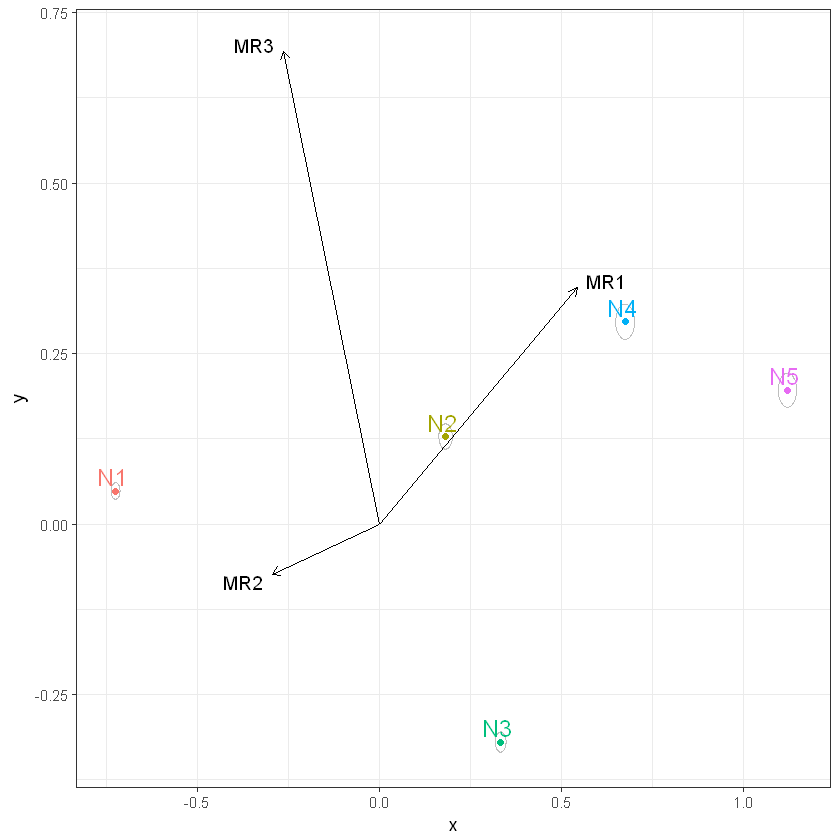

In [226]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

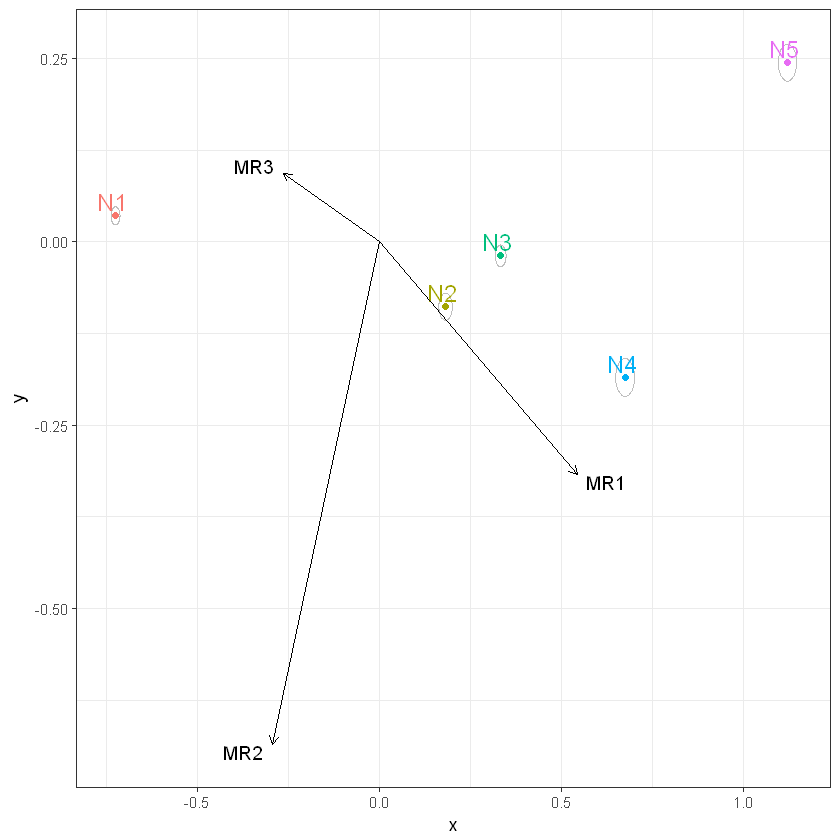

In [227]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

weitere Biplots für AQ2!

...


#### AQ3

In [228]:
X <- Df_total[!is.na(Df_total$V_Niveau_DK),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('N1','N2','N3','N4','N5')
rownames(CoordGrupos) <- c('N1','N2','N3','N4','N5')

In [229]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3,Dim 4
MR1,0.20680383,0.026436408,4.173100e-01,0.34944980
MR2,0.88855377,0.003393126,2.645301e-03,0.10540781
MR3,0.15584749,0.707822194,3.762938e-02,0.09870093
MR4,0.10673632,0.294751030,1.490697e-05,0.59849774
MR5,0.02453166,0.216867669,6.227996e-01,0.13580109
MR6,0.04290231,0.053324236,7.321245e-01,0.17164894


In [230]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3,Dim 4
1,0.9936960,0.005385733,0.0008247236,9.356504e-05
2,0.5921042,0.166527026,0.1659213287,7.544746e-02
3,0.4742848,0.524537379,0.0009918786,1.859748e-04
4,0.6259965,0.318370197,0.0470037371,8.629559e-03
5,0.6800384,0.298030673,0.0218801144,5.079413e-05


In [231]:
#CoordGrupos$clase <- c('Spr_1','Spr_2','Spr_3','Spr_4')
#rownames(CoordGrupos) <- c('Spr1','Spr2','Spr3','Spr4')

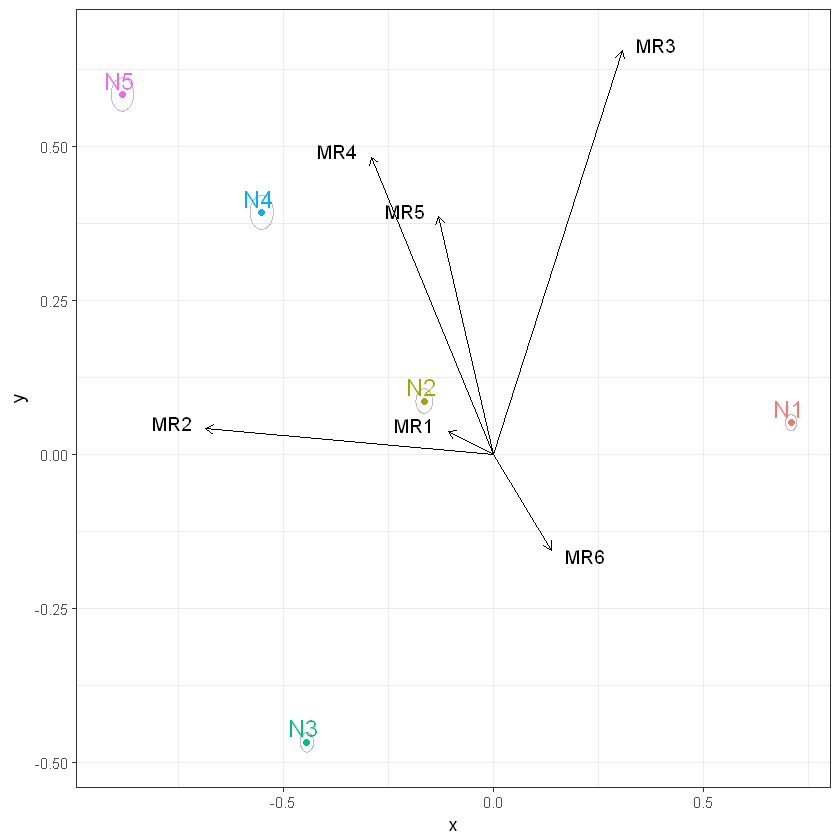

In [232]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

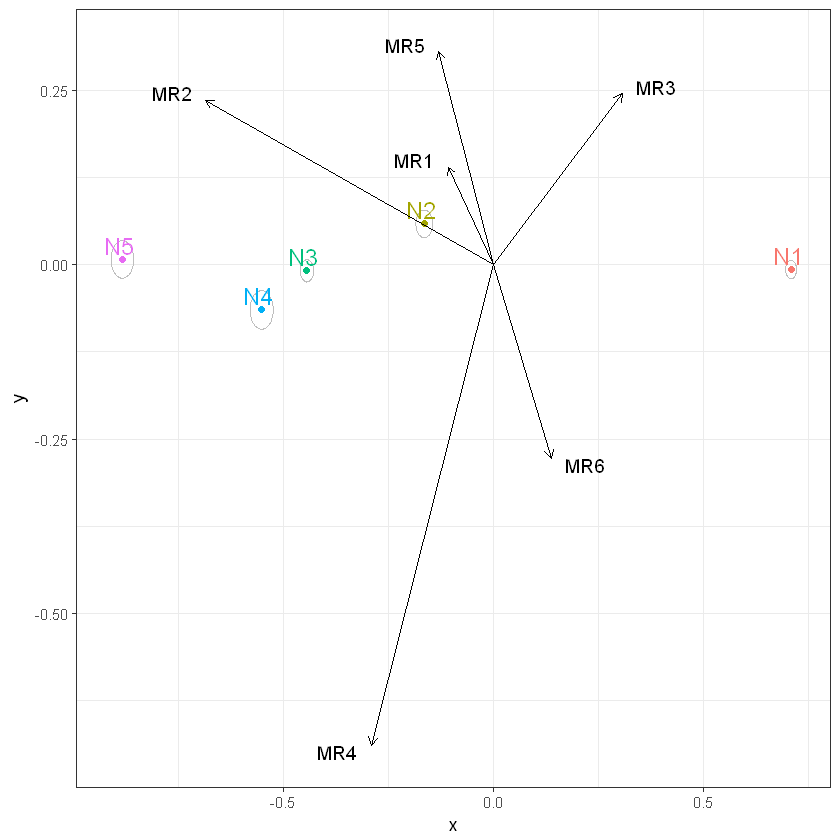

In [233]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,4]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 4`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 4`+.01*sign(CoordVar$`Dim 4`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [234]:
X <- Df_total[!is.na(Df_total$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [235]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.5977600159,3.950225e-01,0.007217502
MR2,0.8563008540,1.442001e-06,0.143697704
MR3,0.2736308134,5.962500e-01,0.130119227
MR4,0.1787508501,2.240653e-01,0.597183892
MR5,0.0001692469,6.679380e-01,0.331892762
MR6,0.1408977237,6.617035e-01,0.197398761


In [236]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9012229,0.07194538,0.026831676
2,0.4063758,0.27997101,0.313653146
3,0.3446435,0.49779122,0.157565322
4,0.8800465,0.11420166,0.005751892


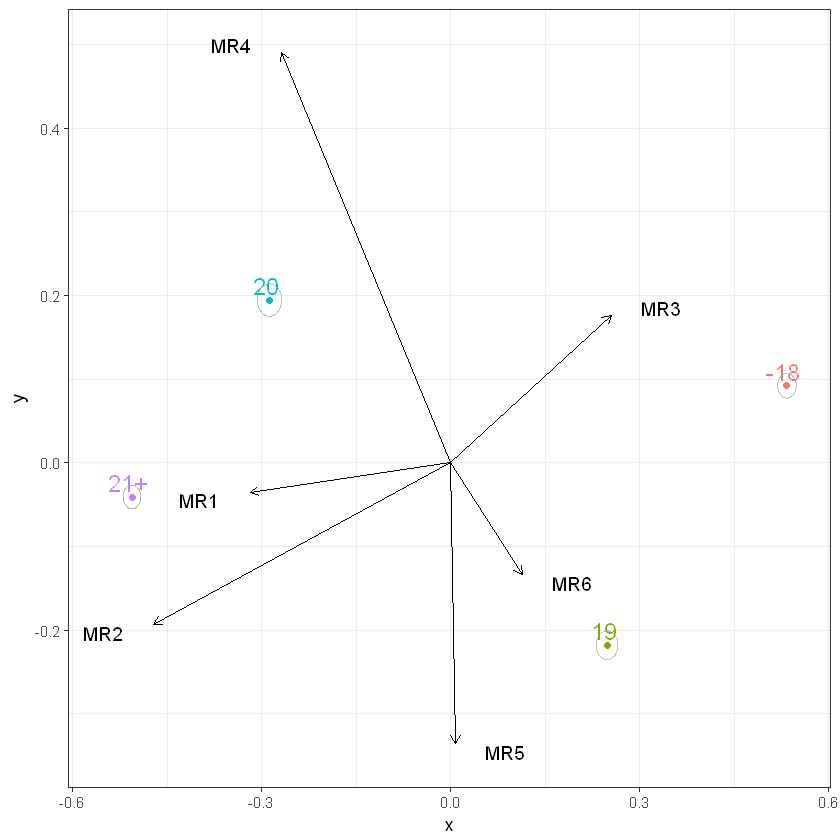

In [237]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [238]:
Df_total_A2 <- Df_total[which(Df_total$V_Niveau_DK=='2'),]

In [239]:
X <- Df_total_A2[!is.na(Df_total_A2$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A2$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [240]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.074259087,0.17032814,0.7554128
MR2,0.495786001,0.48581459,0.0183994
MR3,0.285855979,0.54387624,0.1702678
MR4,0.006930698,0.81802717,0.1750421
MR5,0.927306398,0.05367941,0.0190142
MR6,0.160300355,0.18653040,0.6531692


In [241]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.1366374,0.84212272,0.02123992
2,0.2946208,0.01071018,0.69466907
3,0.9146419,0.01801464,0.06734348
4,0.5529240,0.42549981,0.02157617


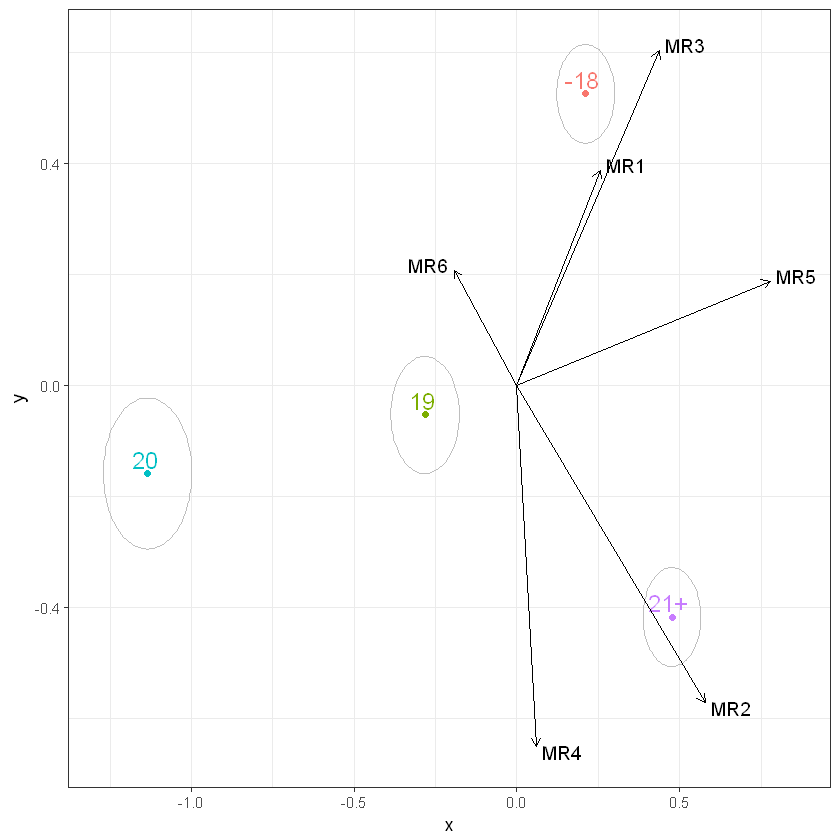

In [242]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

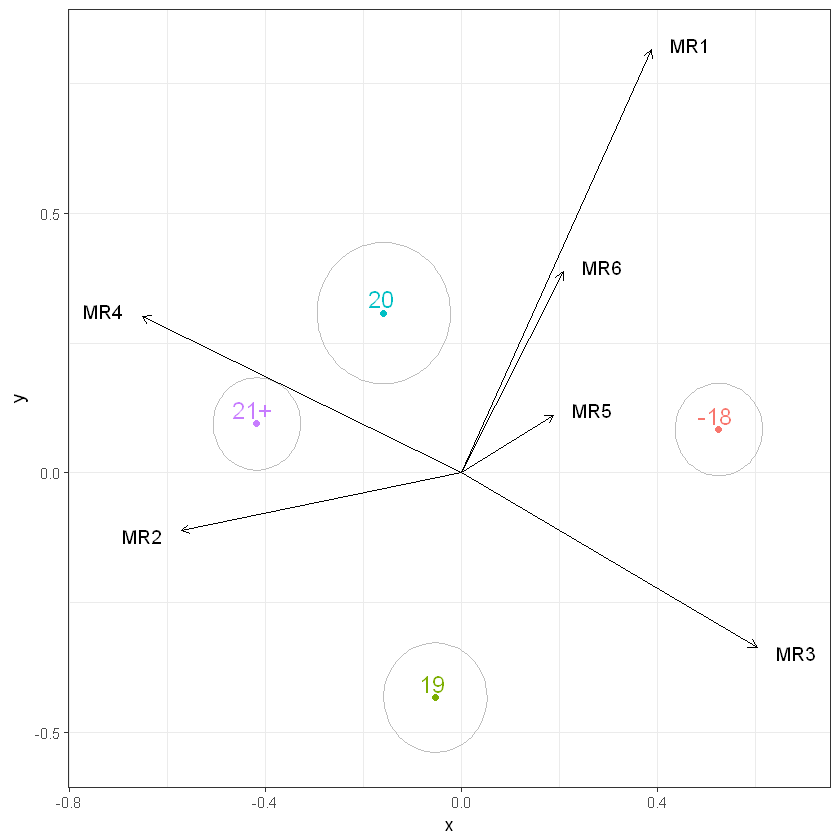

In [243]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [244]:
Df_total_A1 <- Df_total[which(Df_total$V_Niveau_DK=='1'),]

In [245]:
X <- Df_total_A1[!is.na(Df_total_A1$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A1$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [246]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.240003516,0.56226158,0.197734909
MR2,0.136293017,0.85976471,0.003942275
MR3,0.007502834,0.11873814,0.873759030
MR4,0.005409419,0.95558840,0.039002180
MR5,0.367317536,0.00280493,0.629877535
MR6,0.722438707,0.22928086,0.048280433


In [247]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.37785127,0.62214555,3.176909e-06
2,0.10989578,0.85562396,3.448026e-02
3,0.91488709,0.08350231,1.610599e-03
4,0.04915355,0.92498092,2.586553e-02


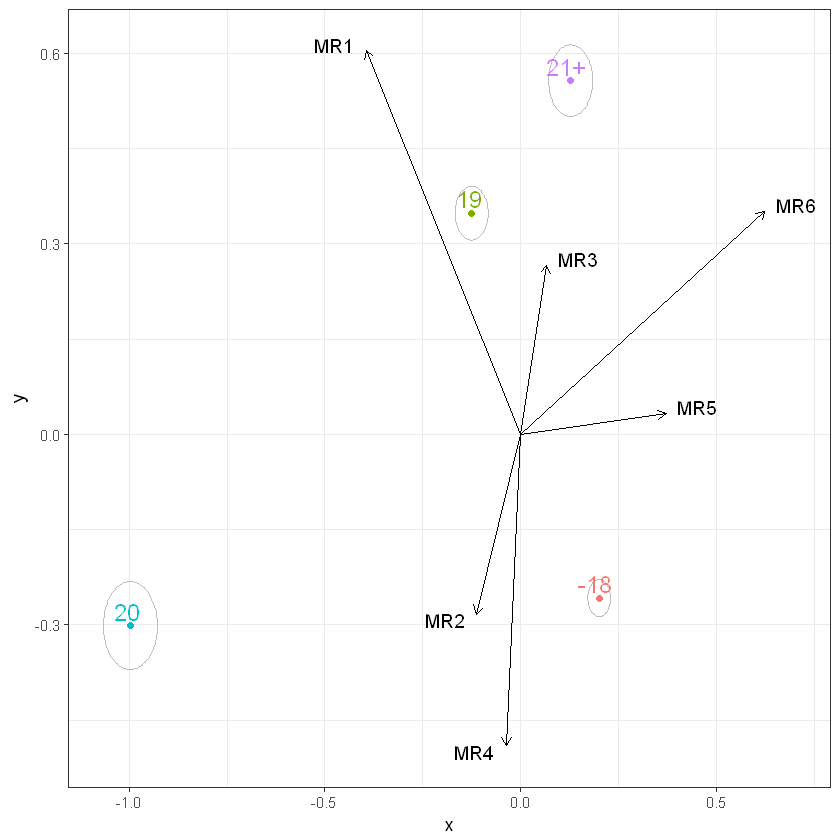

In [248]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

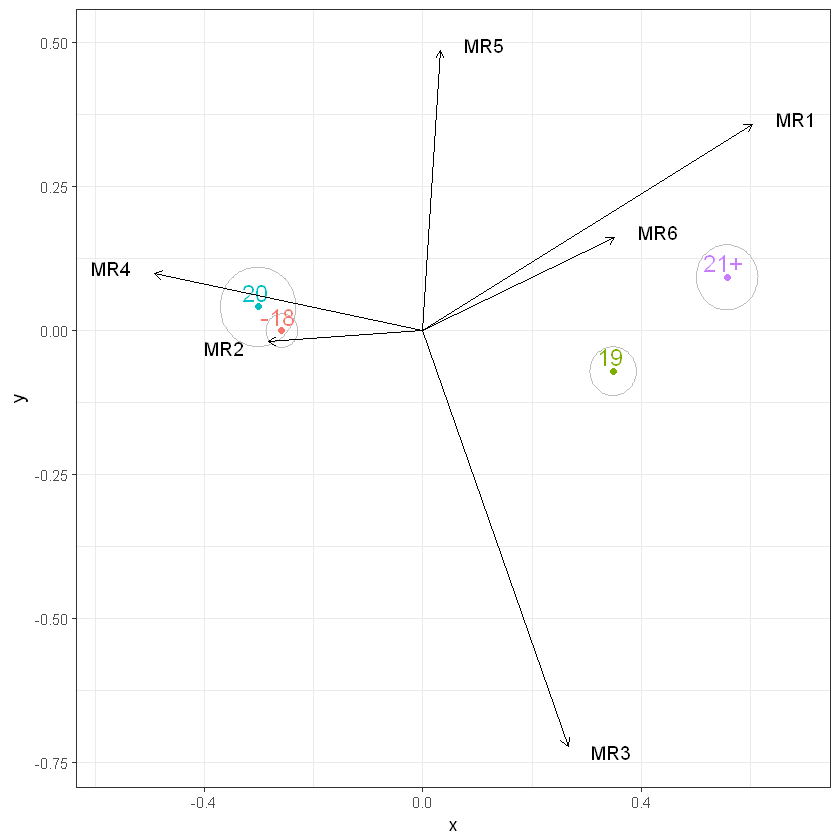

In [249]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [250]:
X <- Df_total_A1[!is.na(Df_total_A1$V_Studienrichtung),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A1$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trad','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trad','Andere')

In [251]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.1799896,0.01811733,0.80189307
MR2,0.3218897,0.30008453,0.37802582
MR3,0.9599019,0.02332767,0.01677042
MR4,0.0887403,0.62538061,0.28587909
MR5,0.3802395,0.60707294,0.01268759
MR6,0.8787519,0.10637722,0.01487090


In [252]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.7137724,0.27714624,0.009081334
2,0.1622048,0.83102267,0.006772553
3,0.8014445,0.08547868,0.113076838
4,0.3649097,0.16876978,0.466320486


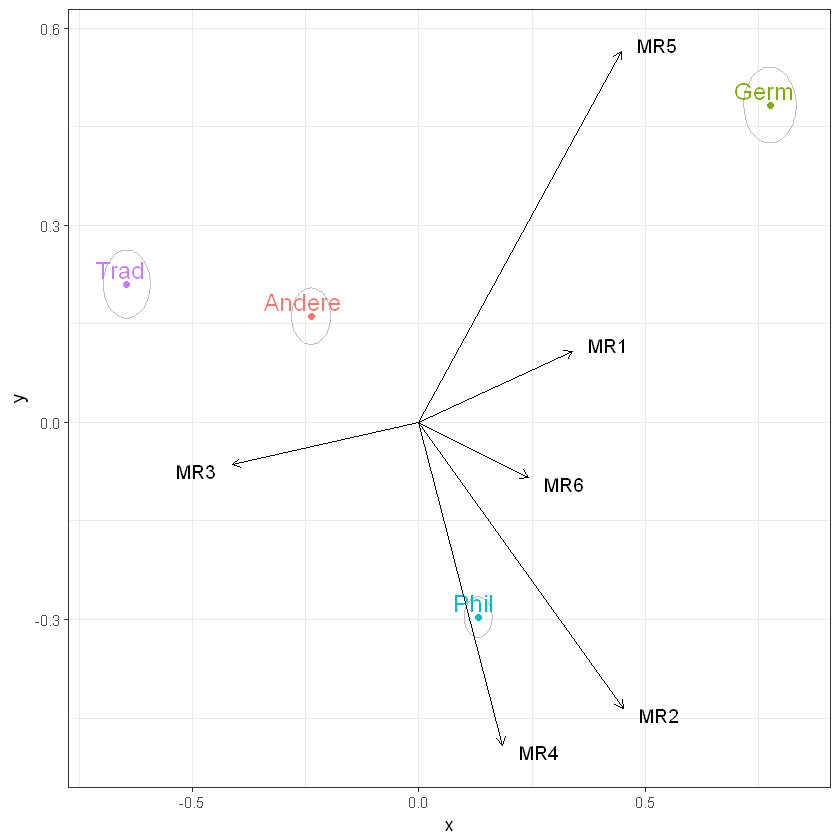

In [253]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

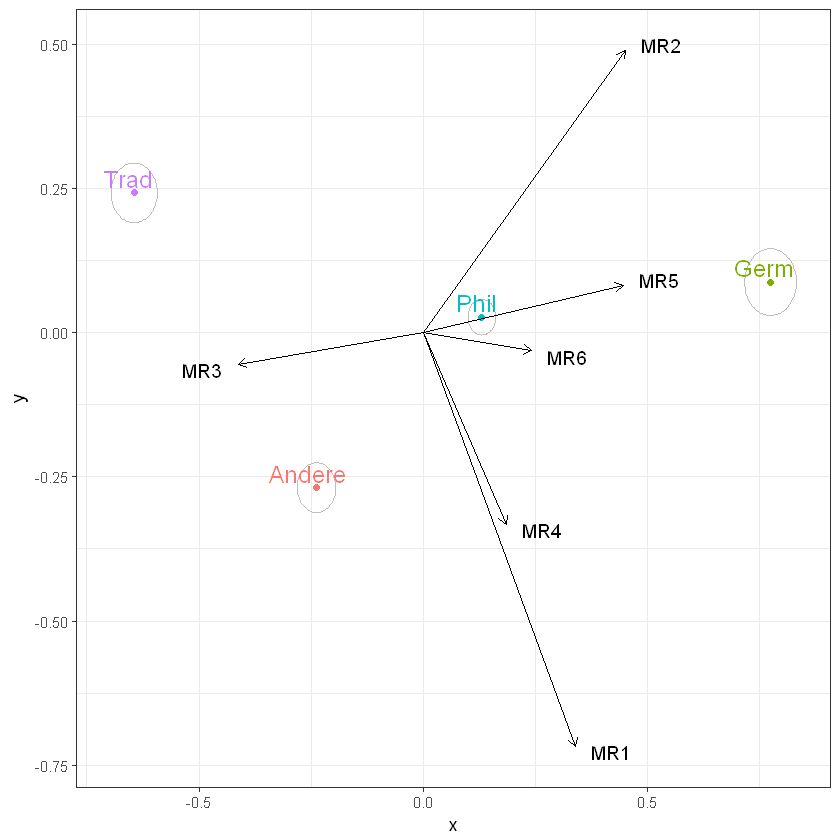

In [254]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

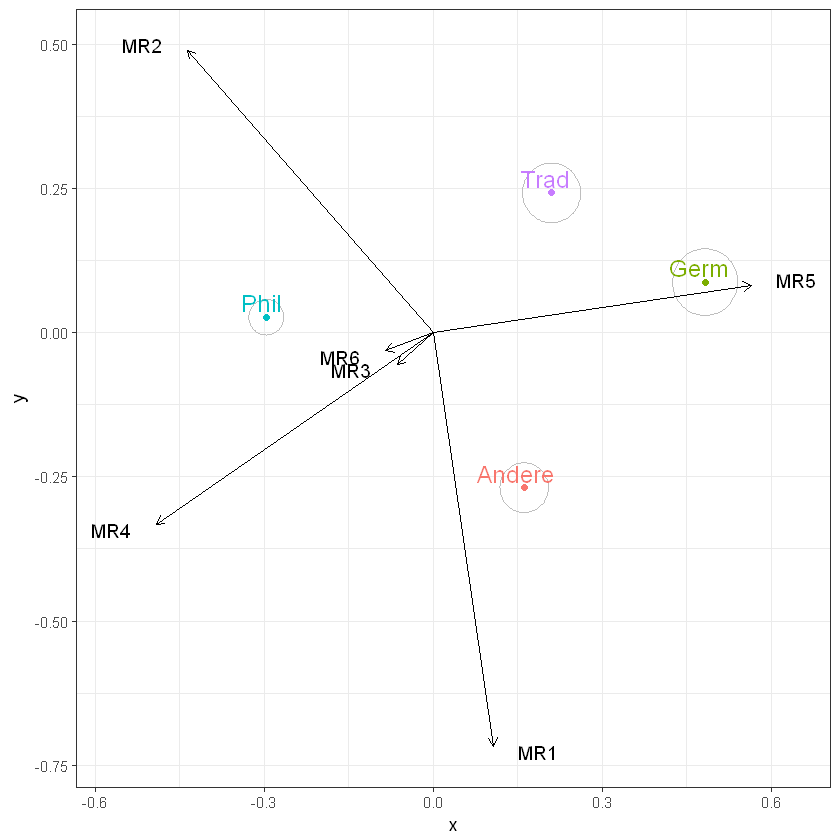

In [255]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")